In [ ]:
#importing modules
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.layers import MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from google.colab.patches import cv2_imshow
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [ ]:
#authorizing google colab to access google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#setting the dataset variable by providing the path where dataset is unzip
dataset = "../content/drive/My Drive/dataset/dataset"

In [ ]:
#getting the list of directiories present in dataset
os.listdir(dataset)

['covid', 'normal', 'output']

In [ ]:
#loading images from the directory 'normal' of dataset in normal[]
normal = []
for img_path in glob.glob(dataset + '/normal/*'):
    normal.append(mpimg.imread(img_path))

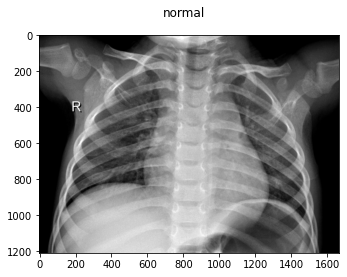

In [ ]:
#plotting the image stored in normal[] first position
fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal[0], cmap='gray')

In [ ]:
#loading images from the directory 'covid' of dataset in covid[]
covid = []
for img_path in glob.glob(dataset + '/covid/*'):
    covid.append(mpimg.imread(img_path))

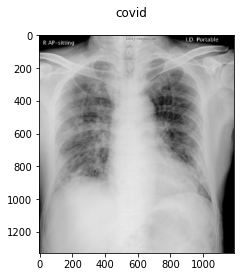

In [ ]:
#plotting the image stored in covid[] first position
fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid[0], cmap='gray')

In [ ]:
#setting image width, image height and the color channel
image_width = 224
image_height = 224
channels = 3

In [ ]:
#setting input shape of images. the classes/folders in dataset, no. of epochs and batch size
input_shape = (image_width, image_height, channels)
classes = 2
epochs = 50
batch_size = 10

In [ ]:
datasettrain = "../content/drive/My Drive/dataset/split/train"

In [ ]:
os.listdir(datasettrain)

['covid', 'normal', 'output']

In [ ]:
datasettest = "../content/drive/My Drive/dataset/split/test"

In [ ]:
os.listdir(datasettest)

['covid', 'normal']

In [ ]:
# Read in the dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2
                                   )

NameError: ignored

In [ ]:
# Read in the dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Read in the dataset
train_generator = train_datagen.flow_from_directory(
   datasettrain,
   target_size=(image_height, image_width),
   batch_size= batch_size,
   class_mode='binary',
   subset='training',
   )

Found 79 images belonging to 3 classes.


In [ ]:
# Read in the dataset
validation_generator = train_datagen.flow_from_directory(
    datasettrain, 
    target_size=(image_height, image_width),
    batch_size= batch_size,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 19 images belonging to 3 classes.


In [ ]:
# Read in the dataset
test_generator = test_datagen.flow_from_directory(
    datasettest,
    target_size=(image_height, image_width),
    batch_size= batch_size,
    class_mode='binary',
    
    )

Found 10 images belonging to 2 classes.


In [ ]:
#creating the convolutional base
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#creating the convolutional base
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#creating the convolutional base
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))

In [ ]:
#creating the convolutional base
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

In [ ]:
#creating the convolutional base
model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))

In [ ]:
#Adding Dense Layers
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:
model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['AUC', 'accuracy'])


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs,
       )

<ipython-input-32-e6fa53ac89cf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
7/7 [==============================] - 33s 5s/step - loss: 2.5715 - auc: 0.4316 - accuracy: 0.6667 - val_loss: 0.6129 - val_auc: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
7/7 [==============================] - 18s 2s/step - loss: 0.6420 - auc: 0.5051 - accuracy: 0.7101 - val_loss: 0.5482 - val_auc: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
7/7 [==============================] - 18s 3s/step - loss: 0.7625 - auc: 0.5982 - accuracy: 0.7000 - val_loss: 0.5478 - val_auc: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
7/7 [==============================] - 18s 2s/step - loss: 0.5787 - auc: 0.6041 - accuracy: 0.7536 - val_loss: 0.1118 - val_auc: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 18s 2s/step - loss: 0.7141 - auc: 0.5240 - accuracy: 0.6957 - val_loss: 0.4443 - val_auc: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
7/7 [==============================] - 18s 3s/step - loss: 0.6234 - auc: 0.4458 - accuracy: 0.7246 - val_loss: 0.4730 -

In [ ]:
#evaluating the model
print("Training_accuracy", history.history['accuracy'][-9])
print("Validation_accuracy", history.history['val_accuracy'][-9])

Training_accuracy 0.9855072498321533
Validation_accuracy 1.0


In [ ]:
label = test_generator.classes
predict = model.predict(test_generator)
predicted_class=np.argmax(predict,axis=1)
labels = (test_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class]
print(predicted_class)
print (labels)
print (predictions)
print(label)

1/1 [==============================] - 1s 992ms/step
[0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']
[0 0 0 0 0 0 0 1 1 1]


In [ ]:
y_pred = model.predict(test_generator)
y_pred =(y_pred>0.5)
list(y_pred)



1/1 [==============================] - 1s 841ms/step


[array([False]),
 array([False]),
 array([ True]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([False]),
 array([ True]),
 array([ True])]

In [ ]:
conf_matrix = confusion_matrix(y_true=label, y_pred= y_pred)
print(conf_matrix)

[[6 1]
 [1 2]]


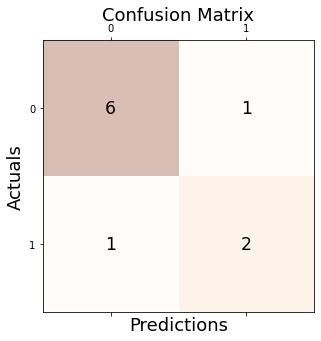

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

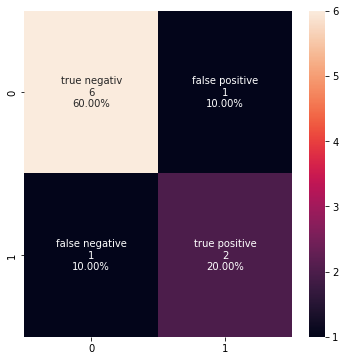

In [ ]:
plt.figure(figsize = (6,6))
group_names = ['true negativ','false positive', 'false negative','true positive']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
CFlabels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
#CFlabels = ['true negativ','false positive', 'false negative','true positive']
CFlabels = np.asarray(CFlabels).reshape(2,2)
sns.heatmap(conf_matrix, linecolor = 'black' , annot = CFlabels, fmt='')

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  blanks = ['' for i in range(cf.size)]
  if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
  else:
        group_labels = blanks
  if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
  else:
        group_counts = blanks

  if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
  else:
        group_percentages = blanks

  box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
  box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
  if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
  else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
  if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

  if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
  plt.figure(figsize=figsize)
  sns.heatmap(conf_matrix,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

  if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
  else:
        plt.xlabel(stats_text)
    
  if title:
        plt.title(title)

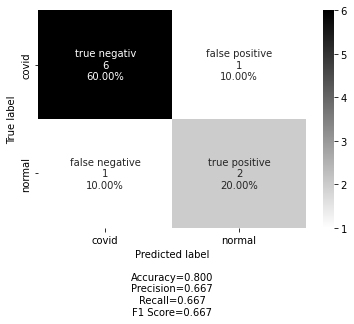

In [ ]:
categories = ['covid', 'normal']
CF_labels = ['true negativ','false positive', 'false negative','true positive']
make_confusion_matrix(conf_matrix, 
                      group_names=CF_labels,
                      categories=categories, 
                      cmap='binary')

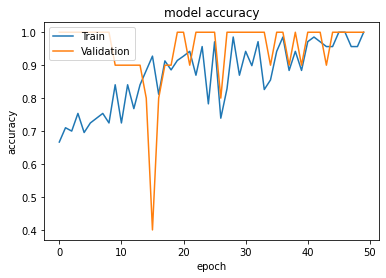

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

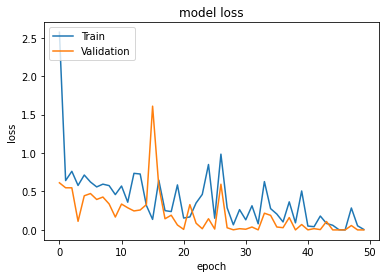

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

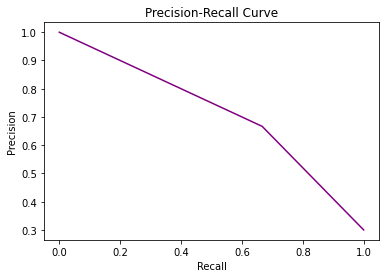

In [ ]:
#calculate precision and recall

precision, recall, thresholds = precision_recall_curve(label, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [ ]:
#calculate ROC
fpr, tpr, thresholds = roc_curve(label, y_pred)

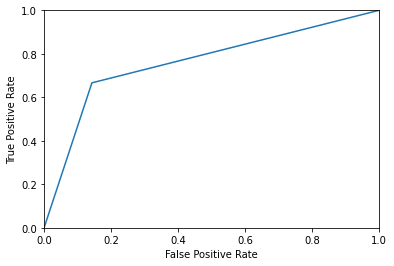

In [ ]:
#Function for plotting ROC Curve
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    

#Calling the function to plot ROC Curve
plot_roc_curve (fpr,tpr)

In [ ]:
#Calculating auc_score
auc_score=auc(label, y_pred)

In [ ]:
print(auc_score)

0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_generator, train_generator.classes)

NameError: ignored